# Copulas: An Essential Guide & Applications in Time Series Forecasting

### What are copula functions and why do we need them

https://towardsdatascience.com/copulas-an-essential-guide-applications-in-time-series-forecasting-f5c93dcd6e99

![3dCopula](Obr1.jpg)


Copulas are functions that model the dependency among several distributions.

They are mostly used in financial applications like portfolio risk assessment and hedge fund management. They came to prominence in 2008, when it was discovered that quantitative scientists had misused copulas in their calculations, [failing to predict significant events](http://samueldwatts.com/wp-content/uploads/2016/08/Watts-Gaussian-Copula_Financial_Crisis.pdf).

Nonetheless, copulas are still great mathematical tools. One compelling reason for studying copulas is that they find numerous applications in **Time-Series Forecasting models**.

In the past few years, many **Deep Learning Forecasting** models started incorporating statistical concepts in their architecture. This is good because the community is moving from the traditional “*stacking transformer blocks with attention*” approach to using *elegant statistical techniques*.

In this article, we discuss:

-Some introductory concepts in statistics.
-Why copulas are useful.
-How to create Gaussian copulas in Python.
-Modern Deep Learning models that use copulas for Time-Series Forecasting.

Let’s dive in.


## Introductory concepts — Optional

If the following terms:

[Probability Integral Transform](https://en.wikipedia.org/wiki/Probability_integral_transform)
[Inverse sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling)
[Empirical Cumulative Distribution Function](https://en.wikipedia.org/wiki/Empirical_distribution_function)



are unknown to you, I suggest reading this section too.

Copulas are easy to understand, but they may intimidate you at first if you are not familiar with the above concepts.

### Probability integral transform

Assume we have a continuous random variable X.

Then, the CDF (cumulative distribution function) of X, called F_x, generates a uniform random variable U . Specifically:

![Formula1](Obr2.jpg)

The technique says we can transform any continuous random variable into a uniform. We will later visually demonstrate how all these techniques work.


### Inverse sampling
Have you ever wondered how distribution generator functions like rnorm() in R and np.random.randn() in Python generate samples?

They use sampling techniques, one of which is called *inverse sampling*. There are numerous sampling techniques — some are more sophisticated and faster than *inverse sampling*.

*Inverse sampling* is simply the inverse of the *probability integral transform* theorem. Given the uniform samples we generated earlier, we can pass them through the **inverse cumulative distribution function** of the original rv X, symbolized as F(x)^(-1), to get back the original X distribution. Specifically:

![Formula2](Obr3.jpg)



Both techniques use the CDF:

**Probability integral transform** uses the **CDF** to convert our samples from [a,b]->[0,1], (where [a,b] is the function’s domain).

**Inverse sampling** uses the **inverse CDF** to convert back our uniform samples to the function’s original samples: [0,1]->[a,b].

Figure 1 displays with more clarity how both techniques work:

![Plot1](Obr4.jpg)


Now, I will demonstrate how these techniques work with a few plots in Python. Our plan is the following:

1. Generate samples from a beta distribution **B**~(10,3).
2. Use the *probability integral transform* to create uniform samples from the beta distribution.
3. Use *inverse sampling* to recreate the original beta samples(10,3) from the uniform samples in **step 2**.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import norm
sns.set(rc={'figure.figsize':(8,3)})

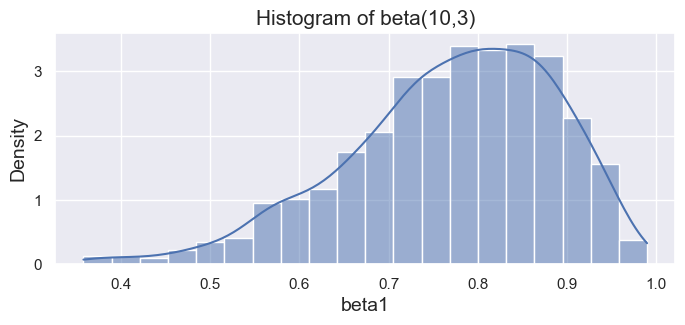

In [7]:
# Step 1: Create a histogram from beta(10,3)
# we start by drawing 1000 samples
beta1 = stats.distributions.beta(a=10, b=3).rvs(1000)
ax = sns.histplot(beta1, kde=True, stat='density')
plt.xlabel("beta1", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Histogram of beta(10,3)", fontsize=15)
plt.show()

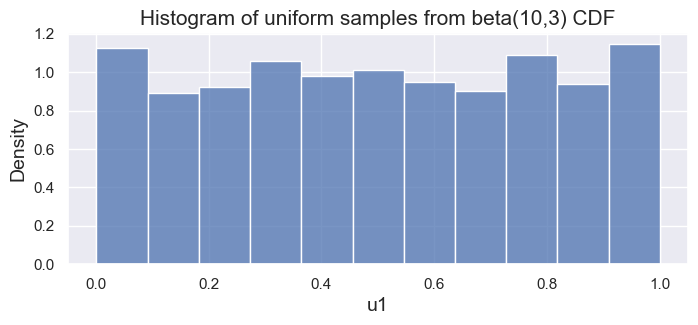

In [8]:
# Step 2: Create a uniform distibution from beta(10,3)
# using the integral probability transform
u1 = stats.beta.cdf(beta1,a=10, b=3)
ax = sns.histplot(u1, stat='density')
plt.xlabel("u1", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Histogram of uniform samples from beta(10,3) CDF", fontsize=15)
plt.show()

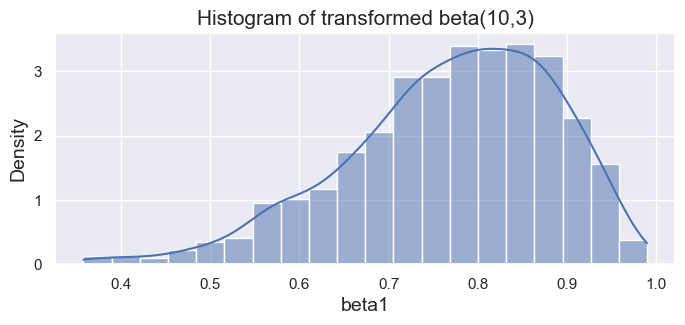

In [9]:
# Step 3: Use inverse sampling to generate beta(10,3) samples
# from the previous uniform samples
# notice that ppf is the inverse cumulative distribution function 
beta_transformed = stats.beta.ppf(u1,a=10, b=3)
ax = sns.histplot(beta_transformed, kde=True, stat='density')
plt.xlabel("beta1", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Histogram of transformed beta(10,3)", fontsize=15)
plt.show()

Figure 2: (Top) The original beta distribution, (Center) The uniform samples from the cdf of beta, (Bottom) The transformed beta distribution (Image by author)

Hence, we returned to our original distribution. You can also experiment with other continuous variables.

Let’s try a gamma distribution. We leave everything as-is, except for switching beta with gamma:

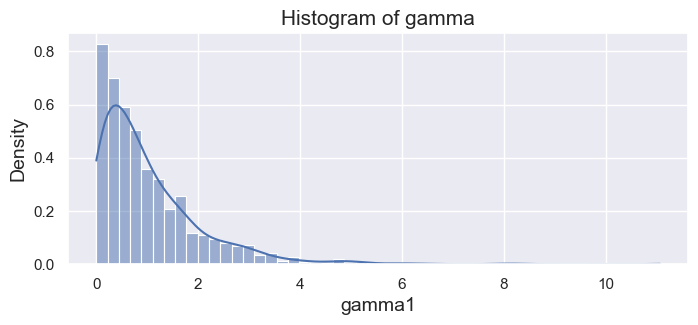

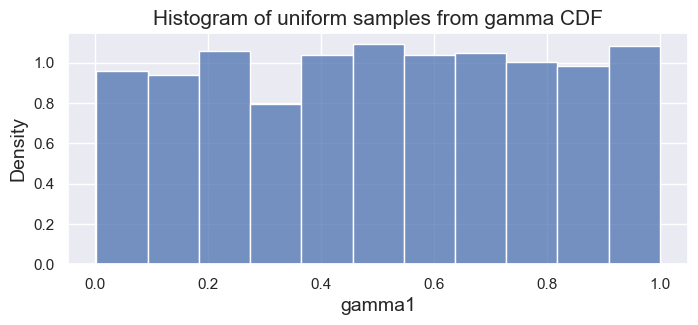

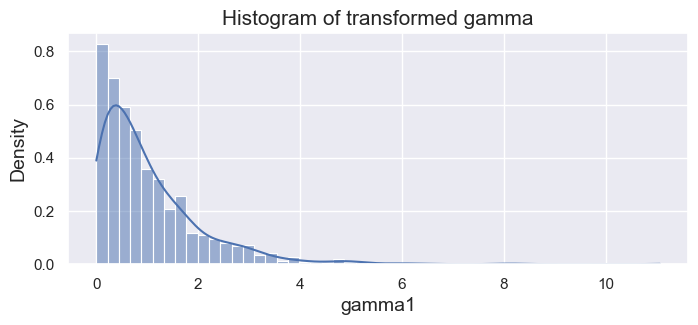

In [10]:
sns.set(rc={'figure.figsize':(8,3)})

# Step 1: Create a histogram from gamma
gamma1 = stats.distributions.gamma(a=1, loc=0).rvs(1000)
ax = sns.histplot(gamma1, kde=True, stat='density')
plt.xlabel("gamma1", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Histogram of gamma", fontsize=15)
plt.show()

# Step 2: Create a uniform distibution from gamma
u1 = stats.gamma.cdf(gamma1, a=1, loc=0 )
ax = sns.histplot(u1, stat='density')
plt.xlabel("gamma1", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Histogram of uniform samples from gamma CDF", fontsize=15)
plt.show()

# Step 3: Use inverse sampling to generate gamma samples
gamma_transformed = stats.gamma.ppf(u1,a=1, loc=0)
ax = sns.histplot(gamma_transformed, kde=True, stat='density')
plt.xlabel("gamma1", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Histogram of transformed gamma", fontsize=15)
plt.show()

Figure 3: (Top) The original gamma distribution, (Center) The uniform samples from the cdf of gamma, (Bottom) The transformed gamma distribution (Image by author)

**Notes:**

-If you use more samples, the plots will better approximate the original distributions.

*-Inverse sampling* does not work with all distributions — e.g. because their inverse CDF is not well-defined (such as in bivariate distributions). There, we use other sampling methods such as [Metropolis-Hastings Monte Carlo](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm) and so on.



If you prefer **R**, here is the example using the gamma distribution:

In [11]:
gamma1 <- rgamma(1e6, shape=1)
hist(gamma1, main='gamma distribution', cex.main=1.3, cex.lab=1.3, cex.axis=1.3, prob='true')

# pgamma is the cdf of gamma
u <- pgamma(gamma1, shape=1)
hist(u, main='Histogram of uniform samples from gamma CDF', cex.main=1.3, cex.lab=1.3, cex.axis=1.3, prob='true')

# qgamma is the inverted cdf of gamma
gamma_transformed <- qgamma(u, shape=1)
hist(gamma_transformed, main='Histogram of transformed gamma', cex.main=1.3, cex.lab=1.3, cex.axis=1.3,prob='true')

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (300312006.py, line 2)

![RExample](Obr5.jpg)

## Empirical distribution function

Usually, the original distribution of our data is unknown.

Or, we want to build a distribution-agnostic model that does not make assumptions about the underlying data.

In that case, the empirical distribution comes handy. It is a powerful and simple method that provides a **non-parametric** estimate of a population’s cumulative distribution function (CDF).

Thus, we can estimate our data’s CDF regardless of their underlying distribution. It is defined as follows:

Let X_1, X_2, …, X_n be a sample of size n from a population with CDF F(x). Then the **empirical CDF** F_n(x) is defined as:

![Formula2](Obr6.jpg)


If that formula confuses you, here’s a more intuitive explanation:

- Take N samples from an unknown distribution.
- Sort these samples, and place them on the x-axis.
- Start plotting a ‘step-function’ style line — each time you encounter a datapoint on the x-axis, increase the step by 1/N.

For the sake of clarity, that process is documented in **Figure 5**:

![Fig5](Obr7.jpg)

The more samples you take, the closer the empirical distribution will resemble the true distribution. The [Kolmogorov-Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) does exactly that.

Specifically, this test determines the distribution of your unknown data sample by constructing and comparing the sample’s *empirical CDF* with the *CDF* you hypothesized. If the two CDFs are close, your unknown data sample likely follows the hypothesized distribution.

Next, in this article, we will use the empirical CDFs slightly differently: To create copulas from data originating from an unknown population.

## Copulas

Before presenting the maths of copulas, we first discuss why we need them.

## Why do we need copulas?

Let’s say we have a collection of random variables. Each random variable reflects a different ‘entity’ among a collection, e.g.

- The securities of a portfolio.
- The sales numbers of a store’s products.
- The electrical energy consumption patterns of various households.

**Challenge 1**: *What mathematical concept can we use to explain those entities?*

We can use a **multivariate distribution** — one that optimally describes our data.

**Challenge 2**: *What if I tell you that these entities are **not** of the same distribution?*

- If each entity has a different behavior, we **cannot** assume they follow the same distribution.
- And most importantly, each entity is likely to influence the others — we **cannot** assume they are independent. Take *product cannibalization*, for example: In retail, a successful product pulls demand away from similar items in its category.

Hence, each *entity* may have a different distribution. Plus, we should find a way to model their correlation, since independence is seldom feasible in most practical scenarios.

We can solve both of these challenges using **copulas**.

## Copulas

Let’s say we have a random vector **z** . You can think of a random vector as a collection of random variables:


**z** = [*z<sub>1</sub>, z<sub>2</sub>, ..., z<sub>N</sub>*]

Next, let F_j be the marginal CDF of z_j for j ∈ [1,N]. Using the *probability integral transform* from earlier, we have:

Given F<sub>j</sub>(Z<sub>j</sub>) = U<sub>j</sub>,

[u<sub>1</sub>, u<sub>2</sub>, ..., u<sub>n</sub>] = **u** = [F<sub>1</sub>(z<sub>1</sub>), F<sub>2</sub>(z<sub>2</sub>), ..., F<sub>N</sub>(z<sub>N</sub>)]

Then, we define a copula C : [0,1] → [0,1]^N the joint CDF of [u_1, u_2, … u_N] :

![Form3](Obr8.jpg)

And that’s the definition of the copula. Or, in plain English:

## A copula is just a multivariate CDF of multiple random variables with uniform marginals U~[0,1] ##

Notice the function’s **domain** and **range** of values: For example, a copula with two variables has a domain of [0,1]² and a range of [0,1]. Don’t worry if you are confused, I will later explain in detail how to plot a copula.

Let’s write the copula function for more clarity:

C(**u**) = P[U<sub>1</sub> <= u<sub>1</sub>, U<sub>2</sub> <= u<sub>2</sub>, ..., U<sub>N</sub> <= u<sub>N</sub>]   (1)


Moreover, the biggest advantage of copulas is that any CDF **F(z)** can be written using a copula function **C** and its marginals F_j .This is also known as **Sklar’s theorem:**

![Form4](Obr9.jpg)

Hence, **we can express any CDF function using a copula.** Note the second line where we used the *probability integral transform*.





## Gaussian copulas

Sklar’s theorem is extremely useful. Let’s try to represent a multivariate Gaussian distribution. In other words, **we will create a Gaussian Copula**.

To make things simple, we will create a **bivariate** Gaussian Copula (N = 2)

First, consider a bivariate Gaussian distribution of 2 random variables, [Z_1, Z_2].

![Form5](Obr10.jpg)

where Φ is the CDF of the standard normal distribution, and Φ_2 is the joint CDF of [Z_1, Z_2] parameterized by the correlation factor ρ. Let’s break down the above equations of the Gaussian Copula:

- **Line 1:** We start with the generic copula definition.
- **Line 2:** We use the inverse sampling trick to convert our uniform marginals to Gaussian.
- **Line 3:** We re-format our equation to express the Gaussian Copula. **The last line is the formal Gaussian Copula formula.**

If you are still confused by the maths, don’t worry. In the next section, we will show step-by-step how to plot Gaussian copulas.


## Gaussian Copulas in Practice

To code and plot a Gaussian Copula we need 3 things:

1. N continuous variables of any continuous distribution.
2. The Gaussian Copula formula.
3. To decide how correlated our random variables will be — the correlation factor ρ previously mentioned.

To keep our example simple, we will use 2 random variables instead of N. Since these 2 distributions are part of the joint copula CDF, we will refer to them as **marginal distributions:**

![Form6](Obr11.jpg)


That is the theoretical background. We have now everything we need to plot our copula.

Now, let’s start by plotting the marginals distributions:

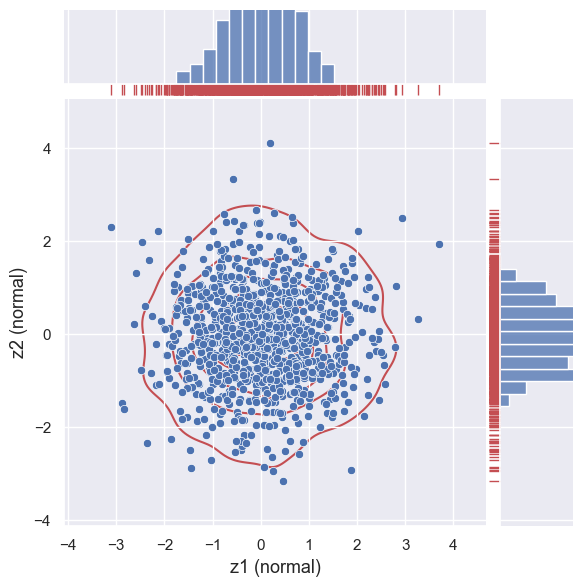

In [12]:
mean1 = 0
std1 = 1
mean2 = 0
std2 = 1

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

z1=np.random.normal(mean1, std1, 1000)
z2=np.random.normal(mean2, std2, 1000)

df_normal=pd.DataFrame({'z1':z1, 'z2':z2})
h = sns.jointplot(x='z1', y='z2', data=df_normal)

h.set_axis_labels('z1 (normal)', 'z2 (normal)', fontsize=13);
h.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
h.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

Figure 6: Joint scatterplot of Z1 and Z2


Next, we convert the Gaussian variables to uniform ones, using the *Probability integral transform*. Remember, copulas take as input the uniform marginals u1 and u2.

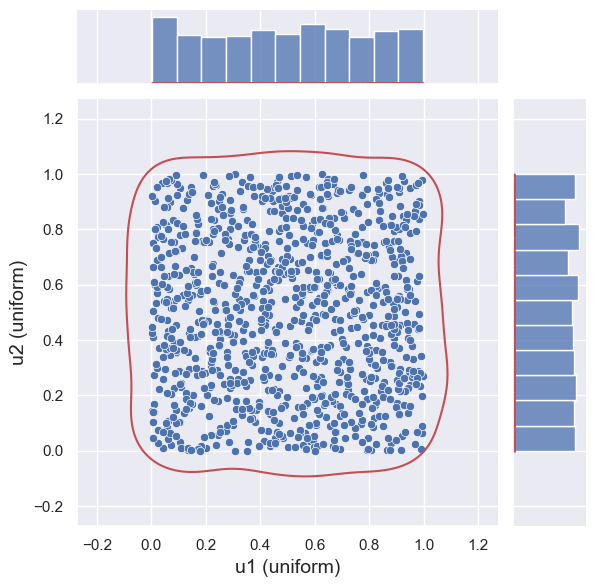

In [34]:
u1 = norm.cdf(z1)
u2 = norm.cdf(z2)

df_uniform=pd.DataFrame({'u1':u1, 'u2':u2})
h = sns.jointplot(x='u1', y='u2', data=df_uniform)

h.set_axis_labels('u1 (uniform)', 'u2 (uniform)', fontsize=14);
h.plot_joint(sns.kdeplot, color="r", levels=1)
h.plot_marginals(sns.rugplot, color="r")

Figure 7: Joint scatterplot of u1 and u2 — both are uniform

Having computed the u1 and u2 variables, we can input them into the Gaussian Copula.

The only thing left to configure is the copula’s correlation factor ρ which decides how correlated the two distributions should be. Let’s use ρ=0.8

The Gaussian Copula plot is displayed in **Figure 8**. To create the copula, we will use the transformations displayed in **Table 1:**

In [37]:
# Gaussian copula: C(u1,u2) = Φ2[ Φ^-1(u1), Φ^-2(u2) ]

#sort the results to make the plot smoother
u1=np.sort(u1)
u2=np.sort(u2)


# make the last sample exactly 1 to make the plot smoother
u1[-1]=1
u2[-1]=1


x1=stats.norm.ppf(u1)  # Φ^-1(u1)
x2=stats.norm.ppf(u2)  # Φ^-1(u2)


# Parameters of Φ2
mu_x = 0
variance_x = 1
mu_y = 0
variance_y = 1
# the covariance parameter is what parameterizes the Gaussian copula
cov=0.8


X, Y = np.meshgrid(x1,x2)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y


#remember phi2_ is just a multivariate normal CDF
rv = stats.multivariate_normal([mu_x, mu_y], [[variance_x, cov], [cov, variance_y]])
phi2 = rv.cdf(pos) 


X, Y = np.meshgrid(u1,u2)

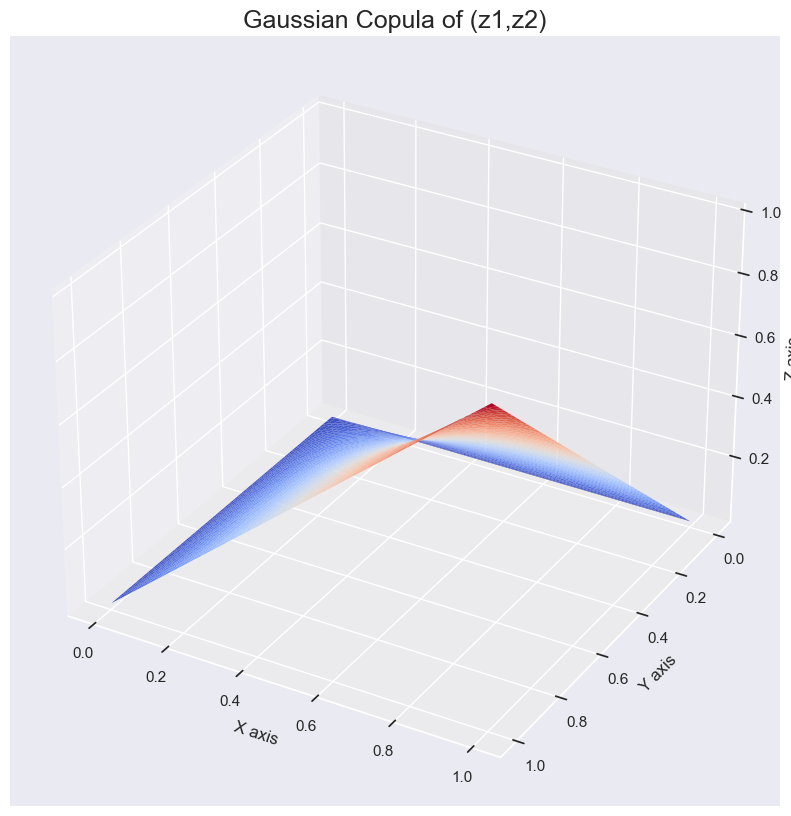

In [40]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, phi2, cmap=plt.cm.coolwarm, linewidth=0)
ax.invert_yaxis()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Gaussian Copula of (z1,z2)', fontdict={'fontsize': 18})
plt.show()

Figure 8: The Gaussian Copula plot from 2 gaussian distributions

Experiment with ρ to observe how the plot changes. Modify mean and variance vectors as well.

Also, notice in Figure 8 that copulas take inputs and outputs in the [0,1] range. Remember earlier how we defined copulas ( C : [0,1] → [0,1]^N , where N is the number of marginals — here we have 2)

Now, it’s time for the crucial question:

***Challenge 3:** Why do we need a Gaussian copula instead of a multivariate Gaussian PDF? After all, a Gaussian copula is just a multivariate CDF.*

- Well, a multivariate Gaussian PDF only requires Gaussian marginals.
- With copulas, we can use the *probability integral transform* to convert **any continuous distribution** to uniform marginals — **while still preserving** the dependency structure.
- In other words, the inputs of copulas can be a mix of any continuous random variable.

##Experiment: Using Beta and Gamma as marginals

Let’s make some plots to demonstrate the above claim.

Instead of using 2 standard normal distributions as inputs, we will use a beta and a gamma random variable — and still get a Gaussian Copula.

In practice, we can use any continuous distribution as input. Also, we can assume our copula knows nothing about the underlying data distributions. To achieve this, we can use the *empirical CDF*, which computes the CDF of the input data regardless of how they are distributed.

Remember, the input distributions for our copula can represent any random event, like a product’s sales. For the sake of clarity, we will use a beta and a gamma distribution:

In [41]:
from statsmodels.distributions.empirical_distribution import ECDF

# Gaussian copula: C(u1,u2) = Φ2[ Φ^-1(u1), Φ^-2(u2) ]
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)


# draw our data samples from 2 distributions, a beta and a gamma - 
beta1 = stats.distributions.beta(a=10, b=3).rvs(1000)
gamma1 = stats.distributions.gamma(a=1, loc=0).rvs(1000)


# - we use the emprical cdf instead of beta's or gamma's cdf
# - we do this to show that copulas can be computed regardless of the
#   underlying distributions
ecdf1 = ECDF(beta1)       # F(beta1) = u1
ecdf2 = ECDF(gamma1)      # F(gamma1) = u2


# small correction to remove infinities
ecdf1.y[0]=0.0001
ecdf2.y[0]=0.0001


x1=stats.norm.ppf(ecdf1.y) # Φ^-1(u1)
x2=stats.norm.ppf(ecdf2.y) # Φ^-1(u1)


# Parameters of Φ2
mu_x = 0
variance_x = 1
mu_y = 0
variance_y = 1
cov=0.8


X, Y = np.meshgrid(x1,x2)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

#remember phi2 is just a multivariate normal CDF
rv = stats.multivariate_normal([mu_x, mu_y], [[variance_x, cov], [cov, variance_y]])
phi2=rv.cdf(pos)


X, Y = np.meshgrid(ecdf1.y,ecdf2.y)

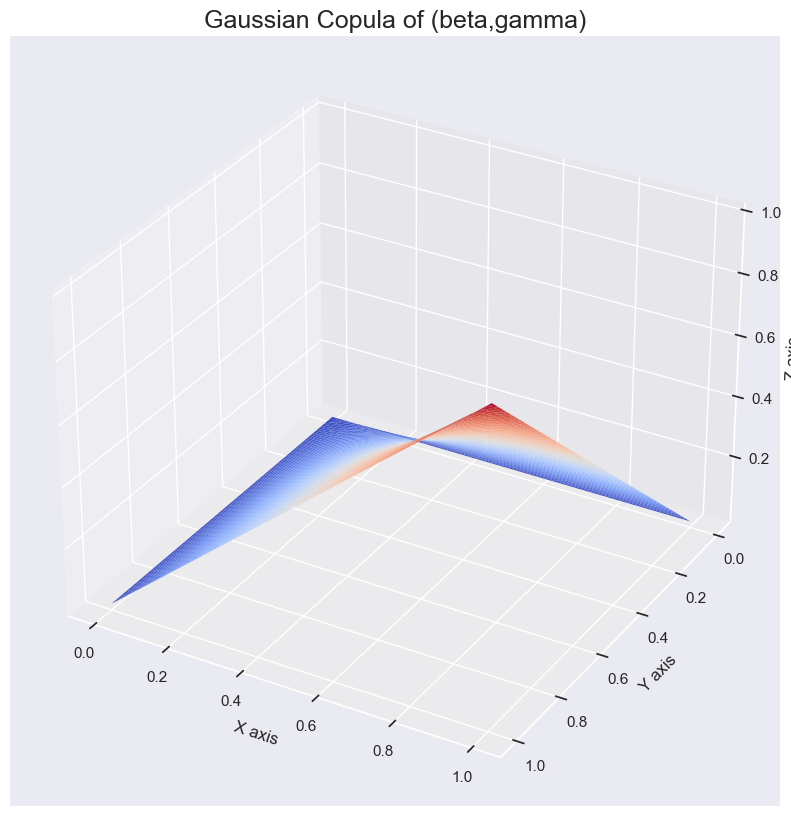

In [43]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, phi2, cmap=plt.cm.coolwarm, linewidth=0)
ax.invert_yaxis()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Gaussian Copula of (beta,gamma)', fontdict={'fontsize': 18})
plt.show()

Figure 9: The Gaussian Copula plot from a beta and a gamma distribution

That’s it. We got the same result. You can find a notebook with all plots [here](https://jovian.com/nkafr/copulas-medium).


Note that other types of copulas exist, such as **Archimedean copulas**. Each copula type has its pros and cons. For example, Archimedean copulas are better at modeling heavy-tailed or skewed distributions.

In this article, we focused on Gaussians Copulas since they are easier to understand — and abundant in time-series applications.

## How to Use Copulas as a Data Scientist

Unless you are an econometrician or a quantitative data scientist, it is unlikely to use copulas. There are some rare use cases in medicine too.

However, copulas have resurfaced again. They find numerous applications in **Deep Learning** models, especially in Time Series Forecasting.

Let’s view some of them:

Deep GPVAR: Deep Gaussian-Process Vector-Autoregressive Model
An improved and novel version of Amazon’s popular TS Forecasting model [DeepAR](https://medium.com/towards-data-science/deepar-mastering-time-series-forecasting-with-deep-learning-bc717771ce85).


**Deep GPVAR[2]** uses an LSTM network to parameterize a Gaussian copula. By applying a Gaussian copula, *Deep GPVAR* jointly models thousands of time series, considering their interdependence.

Remember the **product cannibalization** we mentioned earlier: Let’s say your dataset consists of multiple time series, and each time series represents the sales of a product. If a product suddenly goes well, it will likely influence the sales of similar products.

If you want a model that captures the interdependencies among multiple time sequences, then *Deep GPVAR* is an ideal choice.


## TACTiS: Transformer-Attentional Copulas for Time Series
**TACTiS[3]** is a novel Transformed-based TS forecasting model that also uses copulas.

The model was published by the ServiceNow team — the team behind the breakthrough [N-BEATS](https://medium.com/towards-data-science/n-beats-time-series-forecasting-with-neural-basis-expansion-af09ea39f538) model.

*TaCTICS* works by estimating joint distributions of high-dimensional time series using a transformer architecture that learns to mimic non-parametric copulas. Although *TaCTICS* does not assume that copulas follow a specific distribution (that’s why they are non-parametric), the model uses attention to estimate them.


## CopulaCPTS: Copula Conformal Prediction for Multi-Step Time Series Forecasting
**CopulaCPTS[4]** is also a revolutionary model that combines copulas with a promising method, known as *conformal prediction*.

*CopulaCPTS* is based on conformal prediction, a distribution-free quantification uncertainty method that provides well-calibrated prediction intervals.

Also, *CopulaCPTS* leverages copulas to capture uncertainty between multiple time steps. Thanks to copulas, the model improves upon existing conformal-based implementations by enabling predictions to extend to multiple steps.



## Closing Remarks
Copulas are an essential tool for modeling complex dependencies between variables, particularly in the context of high-dimensional data analysis.

Also, recent advances in Deep Learning have sparked a new interest in them, particularly in Time-Series Forecasting.

We saw 3 novel papers that use copulas in their architecture:

- *Deep GPVAR* uses an *LSTM* to parameterize a Gaussian copula and simulate a Gaussian process.
- *TaCTICS* uses attention to formulate non-parametric copulas.
- *CopulaCPTS* also creates non-parametric copulas empirically from the data.

*Deep GPVAR* and *TaCTICS* are open-source, so feel free to check them out. Also, *Deep GPVAR* is part of Amazon’s Forecasting Suite. *TaCTICS* claims SOTA performance compared to other Transformer-based forecasting models.

Needless to say, after reading and understanding this article, you will have an easier time comprehending the aforementioned papers.

Overall, the resurgence of copulas highlights the importance of modeling complex dependencies between variables in a wide range of applications. Also, their continued use in Deep Learning models suggests that copulas will continue to play a crucial role for the foreseeable future.

## References

[1] Empirical distribution function, [Wikipedia](https://en.wikipedia.org/wiki/Empirical_distribution_function), Licence: Public Domain

[2] Salinas et al. [High-Dimensional Multivariate Forecasting with Low-Rank Gaussian Copula Processes](https://arxiv.org/pdf/1910.03002.pdf)

[3] Drouin et al. [TACTiS: Transformer-Attentional Copulas for Time Series](https://arxiv.org/abs/2202.03528), ICML (June 2022)

[4] Sun et al. [Copula Conformal Prediction for Multi-Step Time Series Forecasting](https://arxiv.org/pdf/2212.03281.pdf)